In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
first_msg_x_y = [135:190, 210:420]
second_msg_x_y = [250:270, 285:370]
captcha_numbers_x_y = [290:310, 410:440]
centenas_box = [18:31, 413:421]
centenas_ygg = [18:31, 385:392]
unidades_ygg = [18:31, 398:406]

SyntaxError: invalid syntax (<ipython-input-3-5ce12a283b15>, line 1)

## 1 - detectar se entrei no processo do captcha 

pegar a posição do "input numbers"

pegar a posição dos numeros

fazer a logica para digitar

In [2]:
#função para mostrar se está sendo encontrado algo, usar para debug
def find(game_image, number_image, threshold=0.9, debug_mode=None):
    
    result = cv.matchTemplate(game_image, number_image, cv.TM_CCOEFF_NORMED)
    locations = np.where(result >= threshold)
    print(result[locations])
    locations = list(zip(*locations[::-1]))
    print(locations)
    if len(locations):
        line_color = (255, 0, 0)
        line_type = cv.LINE_4
        marker_color = (255, 0, 255)
        marker_type = cv.MARKER_CROSS
        
        h, w, c = number_image.shape
        for (x, y) in locations:
            top_left = (x, y)
            bottom_right = (x + w, y + h)
            # Draw the box
            cv.rectangle(game_image, top_left, bottom_right, color=line_color, 
                        lineType=line_type, thickness=2)
        #plt.figure()
        plt.figure(figsize = (20,22))
        plt.imshow(game_img)

    return locations

In [7]:
def checkMsgOnScreen(game_image, needle_image, threshold=0.9):
    result = cv.matchTemplate(game_image, needle_image, cv.TM_CCOEFF_NORMED)
    print(np.max(result))
    return np.any(result >= threshold)

In [3]:
def findNumbers(game_image, threshold=0.9):
    matches = {}
    for i in range(10):
        number_img = cv.imread(f'../images/{i}.jpeg', cv.IMREAD_UNCHANGED)
        result = cv.matchTemplate(game_image, number_img, cv.TM_CCOEFF_NORMED)
        locations = np.where(result >= threshold)
        locations = list(zip(*locations[::-1]))
        for loc in locations: 
            matches[loc[0]] = i
    result = []
    for key in sorted(matches):
        result.append(matches[key])
    return result

In [36]:
#find(game_img, cv.imread(f'mgs1.jpeg', cv.IMREAD_UNCHANGED))
number_img = cv.imread('iradethor2.jpeg', cv.IMREAD_UNCHANGED)
game_img = cv.imread('img_9.jpeg', cv.IMREAD_UNCHANGED)[138:157, 351:436]
checkMsgOnScreen(game_img, number_img)

0.9433712


True

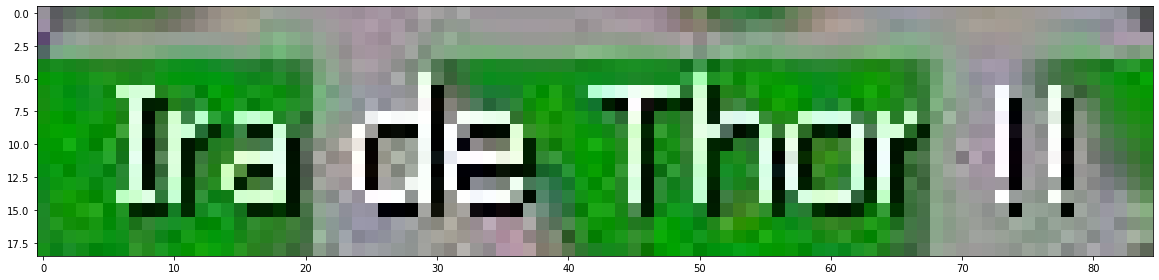

In [35]:
game_img = cv.imread('img_9.jpeg', cv.IMREAD_UNCHANGED)
plt.figure(figsize = (20,22))
plt.imshow(game_img[138:157, 351:436])

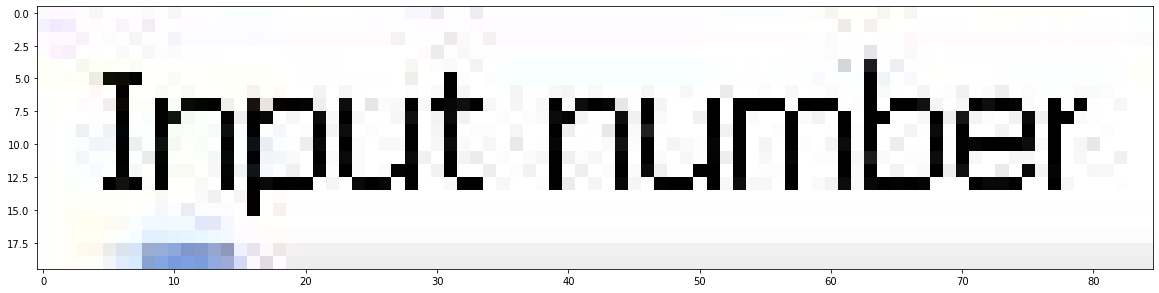

In [39]:
game_img = cv.imread('img_26.jpeg', cv.IMREAD_UNCHANGED)
plt.figure(figsize = (20,22))
plt.imshow(game_img[250:270, 285:370])

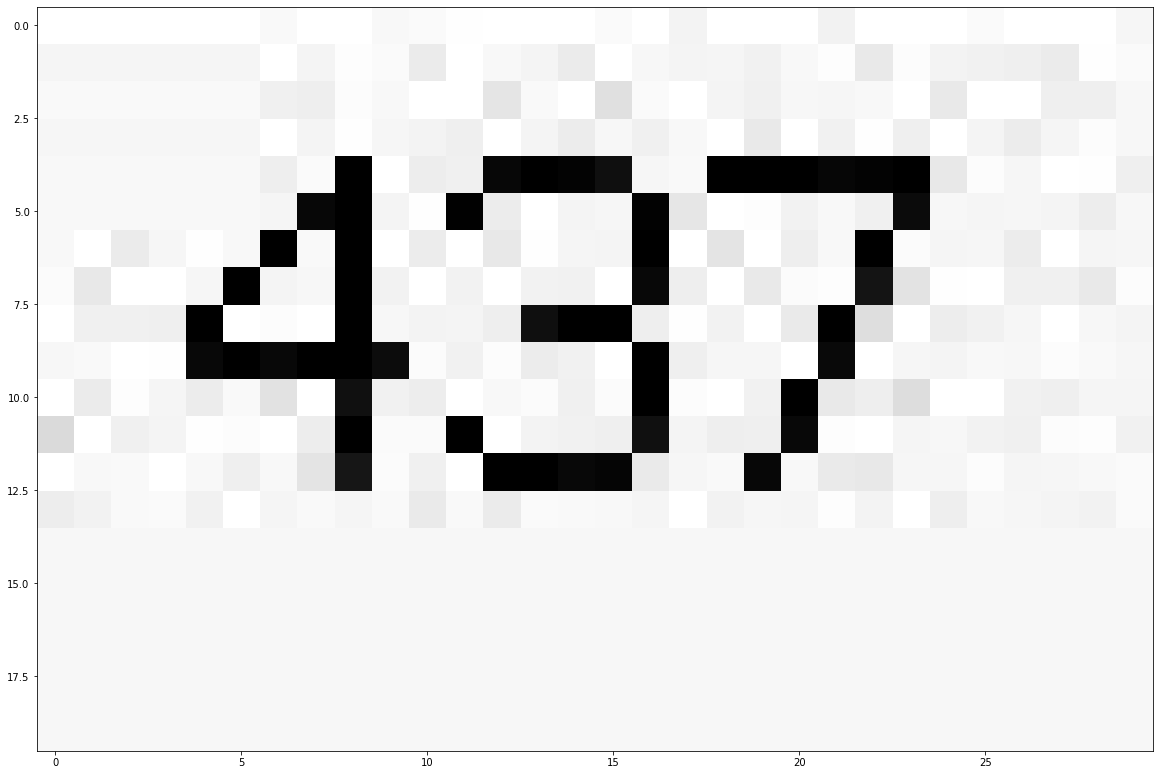

In [59]:
game_img = cv.imread('img_26.jpeg', cv.IMREAD_UNCHANGED)
plt.figure(figsize = (20,22))
plt.imshow(game_img[290:310, 410:440])

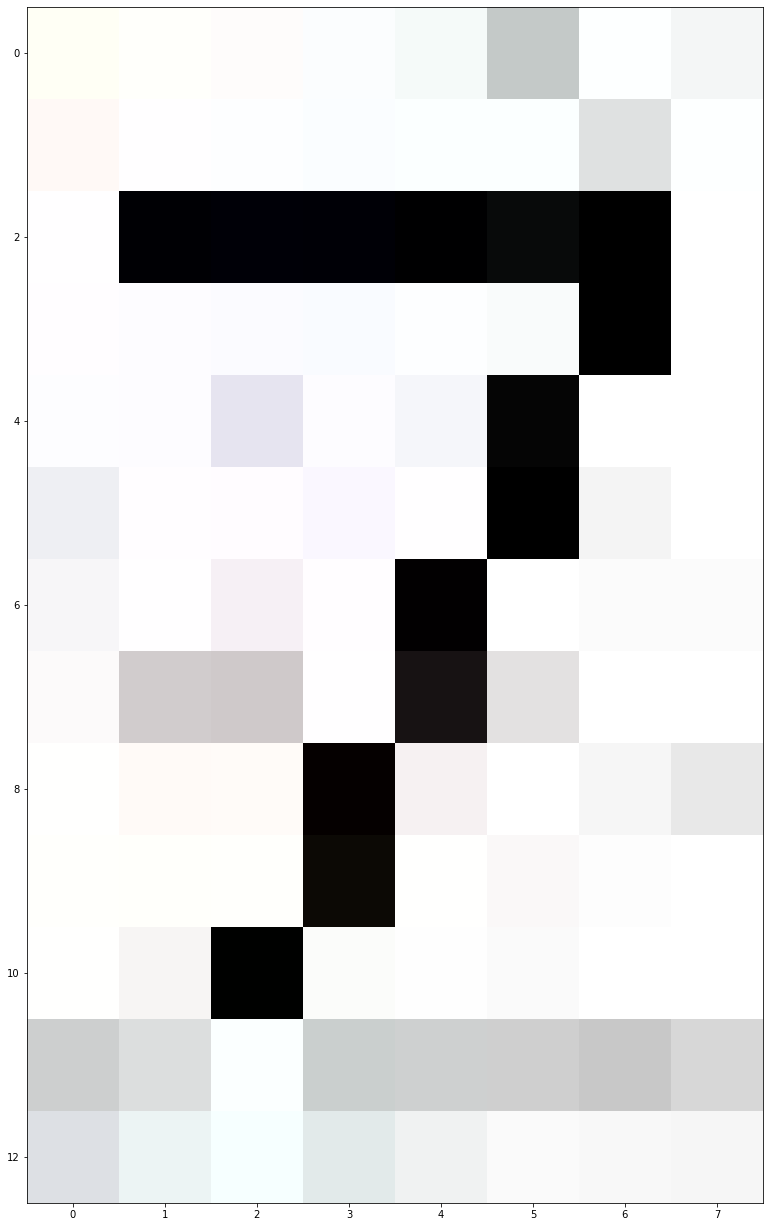

In [12]:
game_img = cv.imread('../img_70.jpeg', cv.IMREAD_UNCHANGED)
plt.figure(figsize = (20,22))
plt.imshow(game_img[18:31, 396:404])

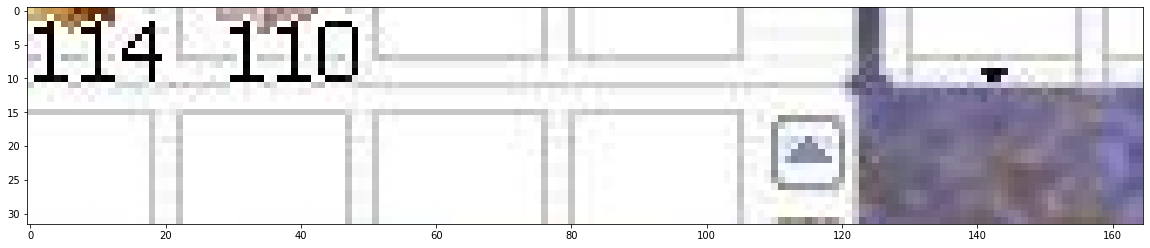

In [80]:
game_img = cv.imread('img_54.jpeg', cv.IMREAD_UNCHANGED)
plt.figure(figsize = (20,22))
plt.imshow(game_img[18:50, 385:550])

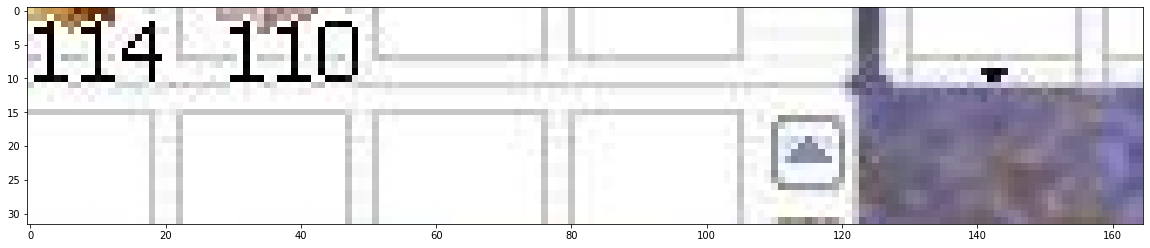

In [80]:
game_img = cv.imread('img_54.jpeg', cv.IMREAD_UNCHANGED)
plt.figure(figsize = (20,22))
plt.imshow(game_img[18:50, 385:550])

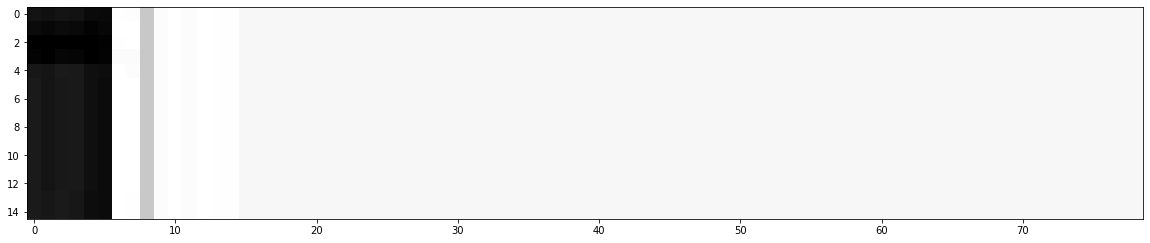

In [5]:
game_img = cv.imread('../img_39.jpeg', cv.IMREAD_UNCHANGED)
plt.figure(figsize = (20,22))
plt.imshow(game_img[323:338, 400:479])

[0.9996708]
[(8, 2)]


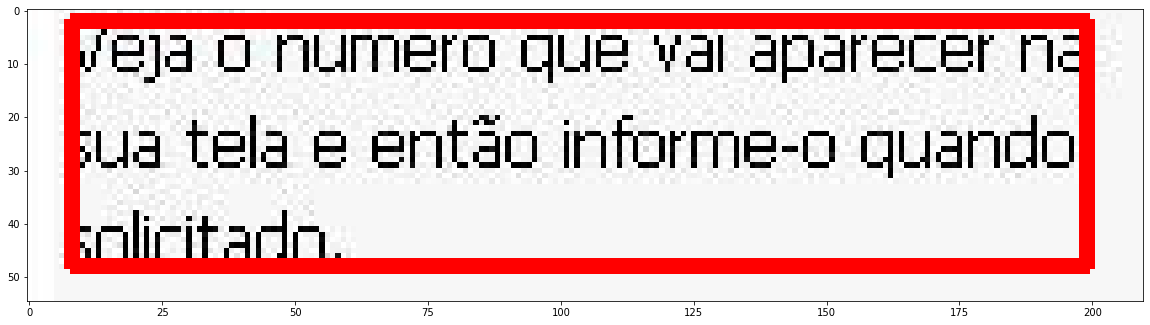

In [45]:
#find(game_img, cv.imread(f'mgs1.jpeg', cv.IMREAD_UNCHANGED))
number_img = cv.imread('msg1.jpeg', cv.IMREAD_UNCHANGED)
game_img = cv.imread('img_31.jpeg', cv.IMREAD_UNCHANGED)[135:190, 210:420]
locations = find(game_img, number_img)

In [44]:
for i in range(10):
    number_img = number_img = cv.imread(f'{i}.jpeg', cv.IMREAD_UNCHANGED)
    game_img = cv.imread('img_37.jpeg', cv.IMREAD_UNCHANGED)[172:185, 237:261]
    if checkMsgOnScreen(game_img, number_img):
        print(i)

1
5
8


In [66]:
findNumbers(game_img[290:310, 410:440])

[4, 3, 7]

## 2 - detectar os numeros do captcha